In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Netflix.csv')

In [3]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [4]:
#Get some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [5]:
df.describe(include='all')

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [6]:
#is there any duplicate records in this dataset? if yes, then remove the duplicate records
df.drop_duplicates(inplace=True)

<Axes: >

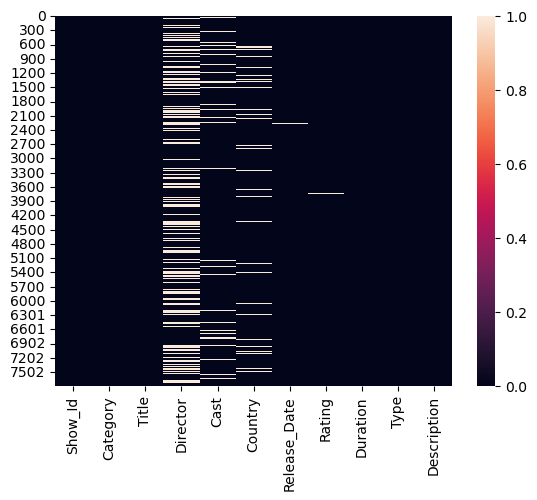

In [7]:
#is there any null values present in any columns? show with heatmap
sns.heatmap(df.isnull())

In [8]:
# for 'House of Cards', what is the show id and who is the director?
df.head(2)
df[['Show_Id','Director']][df['Title']=='House of Cards']

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


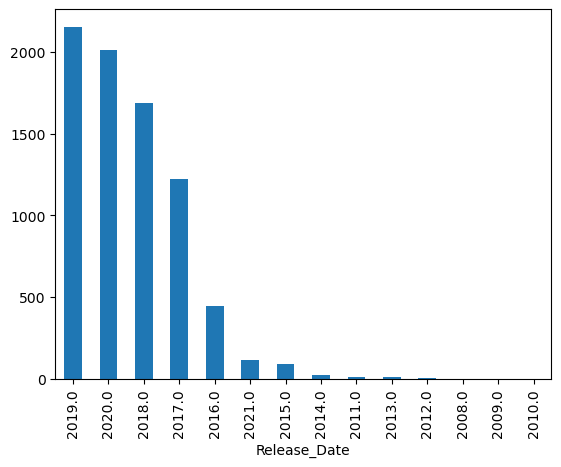

In [9]:
# In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.
df.head(2)
df['Release_Date']=pd.to_datetime(df['Release_Date'])
a=df.groupby(df['Release_Date'].dt.year)['Show_Id'].count().sort_values(ascending=False).plot(kind='bar')

<Axes: >

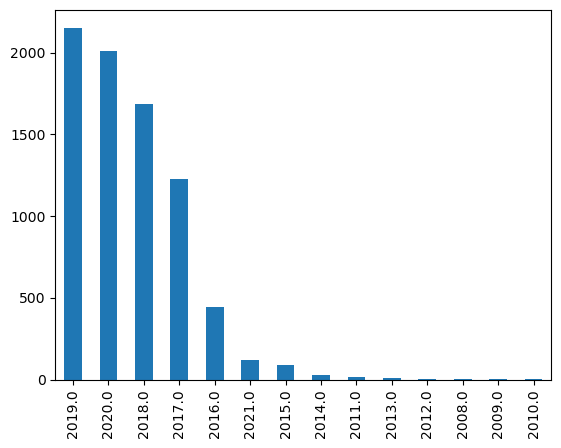

In [10]:
#OR
df['Release_Date'].dt.year.value_counts().plot(kind='bar')

<Axes: xlabel='Category'>

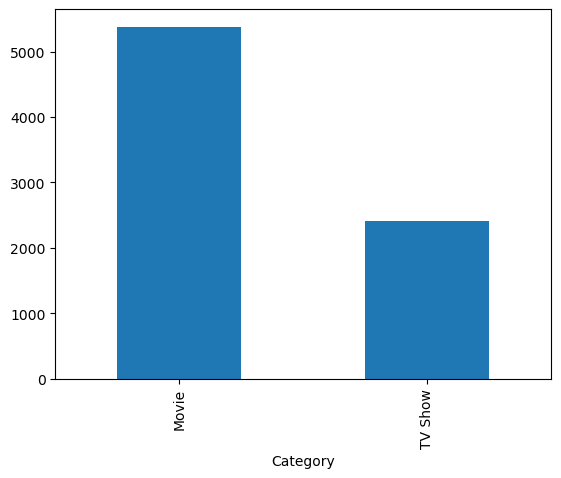

In [11]:
#How many Movies & TV Shows are in the dataset ? Show with Bar Graph.
df.groupby('Category')['Show_Id'].count().plot(kind='bar')

In [12]:
# Show all the Movies that were released in year 2012.
df[df['Release_Date'].dt.year==2012]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
818,s819,Movie,Being Elmo: A Puppeteer's Journey,Constance Marks,"Kevin Clash, Whoopi Goldberg",United States,2012-02-21,PG,76 min,Documentaries,Whoopi Goldberg narrates Elmo creator Kevin Cl...
1229,s1230,Movie,Casa de mi Padre,Matt Piedmont,"Will Ferrell, Gael García Bernal, Diego Luna, ...","United States, Mexico",2012-11-14,R,84 min,Comedies,Will Ferrell stars as a Spanish-speaking cowbo...
3466,s3467,Movie,Kung Fu Panda: Holiday,Tim Johnson,"Jack Black, Angelina Jolie, Dustin Hoffman, Ja...",United States,2012-12-01,TV-PG,26 min,"Children & Family Movies, Comedies","As preparations for the Winter Feast build, Po..."


In [13]:
#Show only the Titles of all TV Shows that were released in India only.
df['Title'][(df['Country']=='India')&(df['Category']=='TV Show')].to_frame()

,Title
86,21 Sarfarosh: Saragarhi 1897
132,7 (Seven)
340,Agent Raghav
364,Akbar Birbal
533,Anjaan: Rural Myths
...,...
6249,The Creative Indians
6400,The Golden Years with Javed Akhtar
6469,The House That Made Me
7294,Typewriter


In [14]:
#Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?
df['Director'].value_counts().nlargest(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

In [15]:
#Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".
df[((df['Category']=='Movie')&(df['Type']=='Comedies'))|(df['Country']=='United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,2019-11-01,TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist..."
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik..."
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,2018-12-20,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...
...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,2017-08-01,TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,2019-02-01,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali..."
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,2020-03-18,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc..."
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,2017-12-31,TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...


In [16]:
#In how many movies/shows, Tom Cruise was cast ?
a = df.dropna(subset='Cast')
a[a['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and..."
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...


In [17]:
#What are the different Ratings defined by Netflix ?
df['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [18]:
#How many Movies got the 'TV-14' rating, in Canada ?
a = len(df[(df['Country']=='Canada')&(df['Rating']=='TV-14')&(df['Category']=='Movie')])
print(f"{a} movies got the 'TV-14' rating in Canada")

11 movies got the 'TV-14' rating in Canada


In [19]:
#How many TV Shows got the 'R' rating, after year 2018 ?
a=len(df[(df['Category']=='TV Show')&(df['Release_Date'].dt.year>2018)&(df['Rating']=="R")])
print(f"{a} TV Shows got the 'R' rating, after year 2018")

1 TV Shows got the 'R' rating, after year 2018


In [20]:
#What is the maximum duration of a Movie/Show on Netflix ?
df[['Minutes','Unit']]=df['Duration'].str.split(" ",expand=True)
df['Minutes'].max()

'99'

In [21]:
#Which individual country has the Highest No. of TV Shows ?
df[df['Category']=='TV Show']['Country'].value_counts().nlargest(1)

United States    705
Name: Country, dtype: int64

In [22]:
#How can we sort the dataset by Year ?
df['Year'] = df['Release_Date'].dt.year
df.sort_values(by='Year',inplace=True)

In [23]:
#Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.
df[((df['Category']=='Movie')&(df['Type'].str.contains('Dramas')))|((df['Category']=='TV Show')&(df['Type'].str.contains('Kids TV')))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Minutes,Unit,Year
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",81,min,2008.0
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,104,min,2009.0
6847,s6846,Movie,The Ryan White Story,John Herzfeld,"Judith Light, Lukas Haas, Michael Bowen, Nikki...",United States,2011-10-01,TV-PG,94 min,Dramas,After contracting HIV from a tainted blood tre...,94,min,2011.0
308,s309,Movie,Adam: His Song Continues,Robert Markowitz,"Daniel J. Travanti, JoBeth Williams, Richard M...",United States,2011-10-01,TV-MA,96 min,Dramas,"After their child was abducted and murdered, J...",96,min,2011.0
7416,s7415,Movie,Victim of Beauty,Roger Young,"William Devane, Jeri Ryan, Michele Abrams, Nic...",United States,2011-10-01,TV-14,93 min,"Dramas, Thrillers",A beauty pageant winner is stalked by a serial...,93,min,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,s2350,Movie,Gangaajal,Prakash Jha,"Ajay Devgn, Gracy Singh, Mohan Agashe, Mohan J...",India,2021-01-08,TV-MA,148 min,"Dramas, International Movies","Posted to a small, crime-ridden town, a cop so...",148,min,2021.0
7572,s7571,Movie,What's Eating Gilbert Grape,Lasse Hallström,"Johnny Depp, Leonardo DiCaprio, Juliette Lewis...",United States,2021-01-01,PG-13,118 min,"Classic Movies, Dramas, Independent Movies","In a backwater Iowa town, young Gilbert is tor...",118,min,2021.0
2413,s2414,Movie,Gimme Shelter,Ron Krauss,"Vanessa Hudgens, James Earl Jones, Rosario Daw...",United States,2021-01-01,PG-13,101 min,"Dramas, Independent Movies","After running away from her abusive mother, a ...",101,min,2021.0
5521,s5521,Movie,Sex and the City 2,Michael Patrick King,"Sarah Jessica Parker, Kim Cattrall, Cynthia Ni...",United States,2021-01-01,R,146 min,"Comedies, Dramas, Romantic Movies","Best friends Carrie, Miranda, Samantha and Cha...",146,min,2021.0


<Axes: ylabel='Rating'>

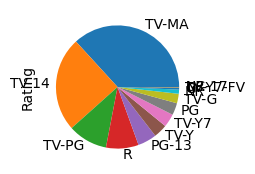

In [24]:
#show by pie chart distribution of movies according to rating
df['Rating'].value_counts().plot(kind='pie',figsize=(2,2))